# Stochastic Gradient Descent


Stochastic Gradient Descent (SGD) is an optimization method that is applicable to problems where
the objective function is given as the sum of several terms 
$$
E(w) = E_1(w) + E_2(w) + \dots + E_N(w)
$$

Many models in machine learning lead to optimization objectives that have this form. For example, when $E_i(w)$ is the prediction error on example $i$ when using parameter $w$, the total error $E(w)$ is the sum of individual terms. 

SGD is an algorithm that can be used in this case. We make the following observations:

* We can work with the average error
$$
\frac{1}{N}E(w) = \frac{1}{N}(E_1(w) + E_2(w) + \dots + E_N(w))
$$
and the true average gradient is 
$$
\frac{1}{N} \nabla E(w) = \frac{1}{N}\nabla  E_1(w) + \frac{1}{N}\nabla E_2(w) + \dots + \frac{1}{N}\nabla E_N(w) \equiv g_{[N]}(w) = g(w)
$$

* In a gradient descent algorithm, the computational burden will come from calculating the gradient for each data point in a big dataset. Remember that after taking a gradient descent, step the parameter will change and we will need to calculate the gradient again from scratch. If the data set is large, we could approximately calculate the true average gradient as

$$
\frac{1}{N} \nabla E(w) \approx \frac{1}{B}\sum_{i\in \Omega}\nabla  E_i(w) \equiv g_\Omega
$$
Here, $\Omega$ is a random subset of $\{1,\dots,N\}$ with $B$ elements.

* We actually don't need to calculate the true average gradient $\frac{1}{N} \nabla E(w)$ exactly. In the extreme case, by just choosing $B=1$, that is just computing the gradient for a single data point, we get an unbiased but noisy estimate of the true gradient. Taking $B$ larger, reduces the variance of the gradient estimate.


$$
g = \left\langle{g_\Omega}\right\rangle
$$




# Maximum Likelihood Estimation

Suppose we wish to estimate the parameter $\theta$, given conditionally independent observations
$$
p(x| \theta) = \prod_{i=1}^N p(x_i| \theta)
$$
The maximum-likelihood estimator $\theta^*$ maximizes the log likelihood function
\begin{align}
\theta^* = \arg\max_\theta \mathcal{L}(\theta) 
\end{align}

The likelihood function can be written as the sum 
$$
\mathcal{L}(\theta) = \sum_{i=1}^N \mathcal{L}_i(\theta) 
$$

$\mathcal{L}_i(\theta) \equiv \log p(x_i| \theta)$

## Example: Estimating the variance parameter of a Gaussian

Assume for $i=1\dots N$, we have conditionally independent observations 
$$
x_i \sim \mathcal{N}(x; 0, \theta)
$$

The likelihood contribution of a single data point is 
$$\log p(x_i|\theta) = \mathcal{L}_i =  - \frac{1}{2} \frac{x_i^2}{\theta} -\frac{1}{2}\log 2\pi \theta$$

The total log-likelihood is the sum of individual data terms 
$$\log p(x|\theta) = \mathcal{L}(\theta) = \sum_{i=1}^N \mathcal{L}_i =  - \frac{1}{2} \frac{\sum_{i=1}^N x_i^2}{\theta} -\frac{N}{2}\log 2\pi \theta$$

$$\frac{\partial \mathcal{L}(\theta)}{\partial \theta} = g(\theta) = -\frac{N}{2 \theta} + \frac{1}{2} \frac{\sum_i x_i^2}{\theta^2}$$

This problem has a solution in closed form:

\begin{align}                                                                                                                                                                                                                                                                                                                                                    g(\theta) & = 0 = -\frac{N}{2 \theta} + \frac{1}{2} \frac{\sum_i x_i^2}{\theta^2} \\
                                                                                                                                                                                                                                                                                                                                                    \theta^* & = \frac{\sum_i x_i^2}{N}
                                                                                                                                                                                                                                                                                                                                                    \end{align}

## Recursive estimation

Let's denote the estimate at $N$'th step as
\begin{align}
\theta^*_{N} & = \frac{\sum_{i=1}^N x_i^2}{N} \\
N \theta^*_{N} & = \sum_{i=1}^{N-1} x_i^2 + x_{N}^2 \\
\theta^*_{N} & = \frac{1}{N}\sum_{i=1}^{N-1} x_i^2 + \frac{1}{N} x_{N}^2 \\
 & = \frac{N-1}{N} \theta^*_{N-1} + \frac{1}{N} x_{N}^2 \\
& = \theta^*_{N-1} + \frac{1}{N} (x_{N}^2 - \theta^*_{N-1})
\end{align}

This recursion leads to the following algorithm
\begin{align}
\theta^*_{1}  & = x_1^2  \\
\text{for } & \tau=2,3,\dots & \\
&\theta^*_{\tau}  = \theta^*_{\tau-1} + \frac{1}{\tau} (x_{\tau}^2 - \theta^*_{\tau-1})
\end{align}




Generate sample data from the true model

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas as pd

mpl.rc('font',**{'size': 20, 'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex=True)

N = 1000
x = np.random.randn(N)

def g(th, N, s):
    return -0.5/th + 0.5*s/N/th**2


# Exact recursive maximum likelihood

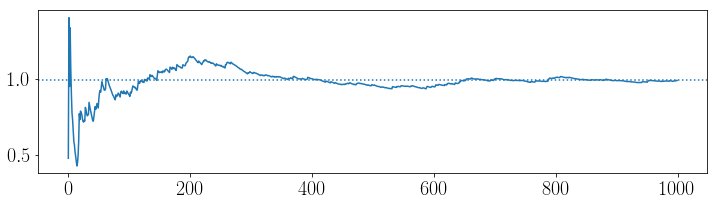

In [55]:
th_star = np.mean(x**2)
th = 0
TH = []
for n in range(N):
    th = th + (x[n]**2 - th)/(n+1)
    TH.append(th)

plt.figure(figsize=(12,3))
plt.plot(TH)
plt.axhline(th_star, ls=':')
plt.show()

The following panel illustrates the true gradient of the likelihood $\mathcal{L}$ with 
estimates obtained on random subsets denoted by $\Omega$. The expectation of the random gradients
is the true gradient

$$
g(\theta) = \left\langle{g_\Omega(\theta)}\right\rangle
$$


In [34]:

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
from matplotlib import rc



def plot_batch(B=1, NumOfBatches=10):
    th = np.linspace(0.4,2)

    for J in range(NumOfBatches):
        s = np.sum(np.random.choice(x, size=B,replace=False)**2)
        plt.plot(th, g(th, B, s), ls='-', alpha=0.3, color='blue')

    s = np.sum(x**2)
    plt.plot(th, g(th, N, s), ls=':', linewidth=4, color='red',label='true')

    plt.gca().set_ylim([-0.2,1])
    plt.grid()

    plt.xlabel('$\\theta$/Parameter')
    plt.ylabel('$g$/Gradient Estimate')
    #plt.legend(['$g_\Omega$','$g(\\theta)$'])
    plt.title('True gradient versus mini-batch')
    plt.show()
    
res = interact(plot_batch, NumOfBatches=(10,400,10), B=(1,500,10))

interactive(children=(IntSlider(value=1, description='B', max=500, min=1, step=10), IntSlider(value=10, description='NumOfBatches', max=400, min=10, step=10), Output()), _dom_classes=('widget-interact',))

# SGD

* Local search algorithms have the form :
\begin{align}
w_0 & = \text{some initial value} \\
\text{for}\;\; & \tau = 1, 2,\dots \\
& w_\tau = w_{\tau-1} + \eta_\tau s_\tau
\end{align}

$\eta_\tau$ is a learning rate and $s_\tau$ is a search direction. 

At each iteration $\tau$, minibatch SGD selects random $i$ from $1\dots N$. Set the search direction 
$$
s_\tau = \nabla\mathcal{L}_i(\theta_{\tau-1})
$$



# Minibatch SGD






At each iteration $\tau$, minibatch SGD selects a random subset $\Omega_\tau$ of size $B_\tau$ of $1\dots N$. Set the search direction 
$$
s_\tau = \frac{1}{B_\tau}\sum_{i\in \Omega_\tau} \nabla\mathcal{L}_i(\theta_{\tau-1})
$$

When the batch size is one ($B=1$), the minibatch SGD algorithm is SGD.

\begin{align}
g_\Omega(\theta)/B & = -\frac{1}{2 \theta} + \frac{1}{2} \frac{\sum_{i\in \Omega} x_i^2}{B\theta^2} \\
& = \frac{1}{2\theta^2}\left(-\theta + \frac{1}{B}\sum_{i\in \Omega} x_i^2\right)
\end{align}


In [92]:

th_true = np.sum(x**2)/N

def plot_path(B=1, eta=1., seed=0):
    np.random.seed(seed)
    theta = 1.5

    MAX_ITER = 1000
    
    TH = []
    TH.append(theta)
    for tau in range(MAX_ITER):
        eta_tau = eta/(tau+1)
        x_omega = np.random.choice(x, size=B)
        theta = theta + eta_tau*(-0.5/theta + 0.5*np.sum(x_omega**2)/B/theta**2 )
        TH.append(theta)

    TH = np.array(TH)
    plt.figure(figsize=(12,3))
    plt.plot(TH)
    plt.axhline(th_true, ls=':',color='r')
    plt.ylabel('$\\theta_\\tau$/Estimate at $\\tau$')
    plt.xlabel('$\\tau$/Iteration')
    
    plt.ylim([0.75, 1.5])

    plt.show()
    
res = interact(plot_path, B=(1,100), eta=(0.01,5,0.01), seed=(0,100))

interactive(children=(IntSlider(value=1, description='B', min=1), FloatSlider(value=1.0, description='eta', max=5.0, min=0.01, step=0.01), IntSlider(value=0, description='seed'), Output()), _dom_classes=('widget-interact',))

A model for outliers

$$
x_i \sim \frac{1}{2}\mathcal{N}(x; 0, \theta) + \frac{1}{2}\mathcal{N}(x; 0, 100)
$$


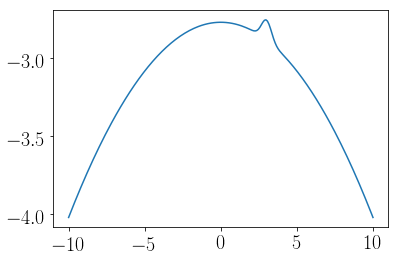

In [221]:
def log_gauss_pdf(x,mu,v):
    return -0.5*np.log(2*np.pi*v) - 0.5*(x-mu)**2/v

x = np.linspace(-10,10,200)
v = 0.1
v0 = 40.
m = 3.

y = np.log(0.006*np.exp(log_gauss_pdf(x,m,v)) + 0.994*np.exp(log_gauss_pdf(x,0,v0)))

plt.plot(x,y)
plt.show()


In [28]:
import torch
import torch.autograd
from torch.autograd import Variable

X_np = np.array([1, 2.5, -3.2, -1.1, 2.2, 2])
X = Variable(torch.from_numpy(X_np).double(), requires_grad=False)

[ 0.62786465]


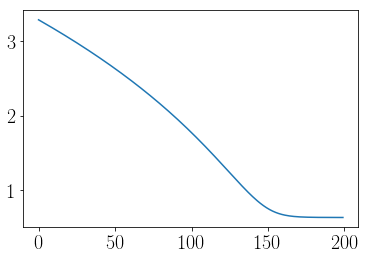

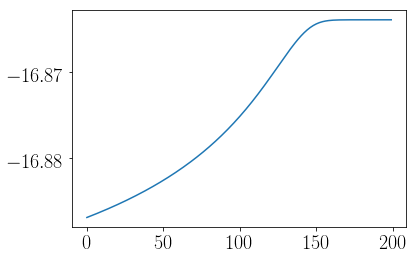

In [36]:
# Implementation 
v  = Variable(torch.DoubleTensor([3.3]), requires_grad=True)
m0 = Variable(torch.DoubleTensor([0.]), requires_grad=False)
m  = Variable(torch.DoubleTensor([3.]), requires_grad=False)
v0 = Variable(torch.DoubleTensor([40.]), requires_grad=False)
c  = Variable(torch.DoubleTensor([0.006,0.994]), requires_grad=False)

def loglik(X, m, v, m0, v0, c):
    return torch.log(c[0]*torch.exp(log_gauss_pdf(X,m,v)) 
                     + c[1]*torch.exp(log_gauss_pdf(X,m0,v0)) )

def log_gauss_pdf(x,mu,v):
#    return -torch.log(v) - (x-mu)*(x-mu)/v
    return -0.5*torch.log(2*np.pi*v) - 0.5*torch.pow(x-mu,2)/v


eta = 2
MAX_ITER = 200
V = []
L = []
for epoch in range(MAX_ITER): 

    # Compute the loglikelihood
    LL = torch.sum(loglik(X, m, v, m0, v0, c)) 
    L.append(LL.data)
    # Compute the gradients by automated differentiation
    LL.backward()
    
    # The gradient ascent step
    v.data.add_(eta*v.grad.data)
    V.append(1*v.data.numpy())
    
    #print(v.grad.data)
    # Reset the gradients, as otherwise they are accumulated in v.grad
    v.grad.zero_() 
    
print(v.data.numpy())

plt.plot(V)
plt.show()
plt.plot(L)
plt.show()


In [5]:

v  = Variable(torch.DoubleTensor([0.05]), requires_grad=True)
m0 = Variable(torch.DoubleTensor([0.]),  requires_grad=False)
m  = Variable(torch.DoubleTensor([3.]),  requires_grad=False)
v0 = Variable(torch.DoubleTensor([40.]), requires_grad=False)
c  = Variable(torch.DoubleTensor([0.006,0.994]), requires_grad=False)

def loglik(X, m, v, m0, v0, c):
    return c[0]*torch.exp(log_gauss_pdf(X,m,v)) + c[1]*torch.exp(log_gauss_pdf(X,m0,v0)) 

LL = torch.sum(loglik(X, m, v, m0, v0, c)) 

LL.backward()

print(v.grad.data)

v.grad.zero_()



1.00000e-03 *
  2.2835
[torch.DoubleTensor of size 1]



Variable containing:
 0
[torch.DoubleTensor of size 1]

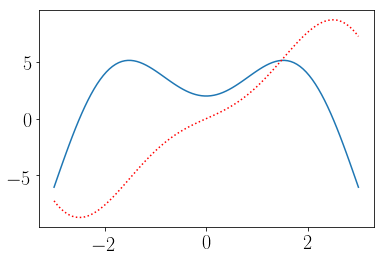

Variable containing:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 100]

In [230]:
def fun(v):
    return torch.sin(v)*v**2 + 2*v

v  = Variable(torch.linspace(-3,3,100), requires_grad=True)
LL = torch.sum(fun(v))
LL.backward()

plt.plot(v.data.numpy(), v.grad.data.numpy())
plt.plot(v.data.numpy(), fun(v).data.numpy(), 'r:')

plt.show()

v.grad.zero_()

In [224]:
torch.linspace(-3,3,100)


 0.9093
[torch.DoubleTensor of size 1]